In [79]:
!pip install -q numpy
!pip install -q pandas
!pip install -q matplotlib
!pip install -q networkx

In [120]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import networkx as nx
from utils.helpers import reading


In [112]:
data = './data/data.csv'
df = reading(data)



df.drop('Cost/Energy…?', axis=1, inplace=True)

# Convert the dataframe to a numpy array
df = df.astype(float)
df['Energy'] = df.sum(axis=1)
df.reset_index().set_index('Processes').head()



print(df.head(3))


0          M-001  M-002  M-003  M-004  M-005  M-006  M-007  M-008  M-009  \
Processes                                                                  
P-001      -73.0    0.0   59.0    0.0   48.0    0.0    0.0    0.0    0.0   
P-002        0.0    0.0    0.0    0.0   73.0    0.0    0.0   11.0    0.0   
P-003        0.0    0.0    0.0   58.0   26.0    0.0    0.0   92.0   43.0   

0          M-010  ...  M-012  M-013  M-014  M-015  M-016  M-017  M-018  M-019  \
Processes         ...                                                           
P-001        0.0  ...  -60.0    0.0    0.0  -26.0    0.0    0.0   -9.0  -15.0   
P-002       69.0  ...    0.0   36.0  -33.0   33.0  -82.0   64.0    0.0  -38.0   
P-003        0.0  ...  -42.0   34.0   -4.0    5.0    0.0    0.0    0.0    0.0   

0          M-020  Energy  
Processes                 
P-001        0.0   -76.0  
P-002      -92.0   112.0  
P-003        0.0   212.0  

[3 rows x 21 columns]


In [117]:
l = []
for process in df.index:
    for material in df.columns:
        l.append((process, material, df.loc[process, material]))

# extract the values of the tuple
t = []
for i in range(len(l)):
    t.append(l[i][2])
print(t)
p = []
for i in range(len(l)):
    t.append(l[i][0])


m = []
for i in range(len(l)):
    t.append(l[i][1])

[-73.0, 0.0, 59.0, 0.0, 48.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -60.0, 0.0, 0.0, -26.0, 0.0, 0.0, -9.0, -15.0, 0.0, -76.0, 0.0, 0.0, 0.0, 0.0, 73.0, 0.0, 0.0, 11.0, 0.0, 69.0, 71.0, 0.0, 36.0, -33.0, 33.0, -82.0, 64.0, 0.0, -38.0, -92.0, 112.0, 0.0, 0.0, 0.0, 58.0, 26.0, 0.0, 0.0, 92.0, 43.0, 0.0, 0.0, -42.0, 34.0, -4.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 212.0, 0.0, 71.0, -28.0, 0.0, -76.0, 0.0, 4.0, -12.0, 0.0, 0.0, -11.0, 0.0, -21.0, 0.0, 0.0, -28.0, 0.0, 18.0, 0.0, 0.0, -83.0, 0.0, -2.0, 0.0, -71.0, 37.0, 0.0, 0.0, 19.0, 16.0, -43.0, -9.0, 98.0, -7.0, 0.0, 0.0, 0.0, 0.0, -91.0, 22.0, 4.0, -27.0, 0.0, -97.0, 0.0, 0.0, 0.0, 0.0, 79.0, 0.0, -11.0, 0.0, 0.0, 0.0, 8.0, 0.0, 16.0, 0.0, 0.0, 0.0, 20.0, 22.0, 37.0, 87.0, 0.0, 0.0, 0.0, 0.0, 4.0, 22.0, 60.0, 69.0, 59.0, 0.0, -96.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 206.0, 47.0, 10.0, 0.0, -28.0, 6.0, 58.0, 0.0, -5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.0, -71.0, 0.0, 18.0, -33.0, 76.0, 25.0, 51.0, 0.0, 0.0, 67.0, -5.0, -95.0, -34.0, 0.0, 0.0

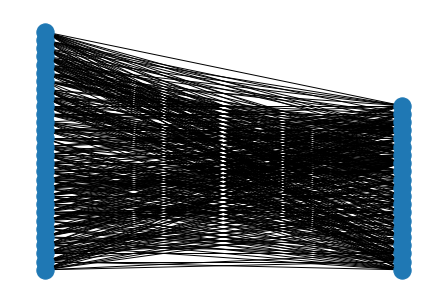

In [122]:
## making the bipartite graph 
from networkx.algorithms import bipartite


###
### MAKING THE EDGE LIST
###

## get the processses 
processes = list(df.index)
## get the materials 
materials = list(df.columns)

## get the edge lists 
## make an edgelist dictionary 
edge_list = []
for process in df.index:
    for material in df.columns:
        #d = dict(A=process, B=material, energy=df.loc[process, material])
        if df.loc[process, material] != 0:
            edge_list.append((process, material))


###
### MAKING THE BIGRAPH
###

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# Add edges only between nodes of opposite node sets
B.add_edges_from(edge_list)


## get the bipapartite parts 
# u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
# v = [n for n in B.nodes if B.nodes[n]['bipartite'] == 1]

###
### MAKING THE BIGRAPH POSITION
###
# Separate by group
left_set, right_set = bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))


## for each connection, add the corresponding value from the dataframe
for edge in B.edges():
    B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

nx.draw(B, pos=pos)
plt.show()

In [125]:
!pip install -q pyvis
!pip install -q IPython

In [ ]:

from pyvis import network as net
from IPython.core.display import display, HTML

In [126]:
ids=['C', 'N', 'C', 'N', 'C', 'C', 'C', 'O', 'N', 'C', 'O', 'N', 'C', 'C']
xs=[2.776, 1.276, 0.3943, -1.0323, -1.0323, 0.3943, 0.7062, 2.1328, -0.4086, -1.8351, -2.9499, -2.147, -3.5736, -0.0967]
ys=[0.0, 0.0, 1.2135, 0.75, -0.75, -1.2135, -2.6807, -3.1443, -3.6844, -3.2209, -4.2246, -1.7537, -1.2902, -5.1517]
bonds=[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [8, 9], [9, 10], [9, 11], [11, 12], [8, 13], [5, 1], [11, 4]]
g3=net.Network(height='400px', width='80%',heading='')
g3.set_options('''
var options = {
    "nodes": {
    "borderWidth": 2,
    "borderWidthSelected": 4
  },
  "edges":{
    "width":24
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant":-2000,
      "centralGravity": 0,
      "springLength": 60,
      "springConstant": 0.545,
      "damping": 0.1,
      "avoidOverlap": 0.52
    },
    "maxVelocity:":50,
    "minVelocity": 0.75,
    "timestep": 0.5
  }
}
''')
for atomo in range(14): 
  g3.add_node(atomo,label=ids[atomo],x=int(100*xs[atomo]),y=int(100*ys[atomo]),physics=True,size=30)

g3.add_edges(bonds)
show_graph(g3,'g3.html')

NameError: name 'show_graph' is not defined

In [ ]:
import networkx as nx
G = nx.karate_club_graph()

g4 = Network(height='400px', width='50%',notebook=True,heading='Zachary’s Karate Club graph')

g4.from_nx(G)

g4.show_buttons(filter_=['physics'])
g4.show('karate.html')
display(HTML('karate.html'))